In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
dir_guia="informacionCerveza.xlsx"
guia=pd.read_excel(dir_guia)
guia.head(7)

,Cerveza,Marca,IBU,Alcohol,cuerpo,Aroma,Color
0,Pale ale american style,WALNUSS,27,5.3,bajo,lupulo con notas de mago y maracuya,Rubia - Color dorado intenso con blanca espuma...
1,American india pale ale,WALNUSS,54,5.6,bajo,Citrico y frutal,Rubia - Color dorado intenso con blanca espuma
2,Scottish Ale,WALNUSS,13,5.1,moderado,NaN,Oscura - Color ambar/cobrizo con espuma moderada
3,English porter,WALNUSS,18,5.8,medio,Intenso con notas tostadas,Negra - Color marron oscuro/negra de espuma pe...
4,Arrogante indian pale ale,WALNUSS,72,6.8,bajo - moderado,Frutal Herbal,Rubia - Color dorado intensa con blanca espuma
5,Cream ale,WALNUSS,18,5.3,medio - bajo,Maiz levemente dulce,Rubia - Color dorado palida con blanca espuma ...


In [3]:
dir_a="americaindiapaleale.xls"
dir_b="arroganteindiapaleale.xls"
dir_c="creamale.xls"
dir_d="ENGLISHPORTER.xls"
dir_e="palealeamericanstyle.xls"
dir_f="scottish.xls"

a=pd.read_excel(dir_a,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
b=pd.read_excel(dir_b,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
c=pd.read_excel(dir_c,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
d=pd.read_excel(dir_d,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
e=pd.read_excel(dir_e,header=1,usecols=["Valor_R","Valor_V","Valor_A"])
f=pd.read_excel(dir_f,header=1,usecols=["Valor_R","Valor_V","Valor_A"])

a.drop(0, inplace=True)
b.drop(0, inplace=True)
c.drop(0, inplace=True)
d.drop(0, inplace=True)
e.drop(0, inplace=True)
f.drop(0, inplace=True)


In [4]:
a["IBU"]=54
b["IBU"]=72
c["IBU"]=18
d["IBU"]=18
e["IBU"]=27
f["IBU"]=13

a["ALCOHOL"]=5.6
b["ALCOHOL"]=6.8
c["ALCOHOL"]=5.3
d["ALCOHOL"]=5.8
e["ALCOHOL"]=5.3
f["ALCOHOL"]=5.1

a["CUERPO"]=0
b["CUERPO"]=1
c["CUERPO"]=1
d["CUERPO"]=2
e["CUERPO"]=1
f["CUERPO"]=2

a["COLOR"]=0
b["COLOR"]=0
c["COLOR"]=0
d["COLOR"]=1
e["COLOR"]=0
f["COLOR"]=2


df=pd.concat([a,b,c,d,e,f], axis=0,ignore_index=True)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[["Valor_R","Valor_V","Valor_A"]], pd.get_dummies(df["CUERPO"]), test_size = 0.3, stratify = df["CUERPO"])

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(3, input_dim=3,activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=400,validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 3)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
132/132 [==============================] - 1s 5ms/step - loss: 159.4824 - accuracy: 0.4965 - val_loss: 29.5872 - val_accuracy: 0.4097
Epoch 2/400
132/132 [==============================] - 0s 3ms/step - loss: 11.8264 - accuracy: 0.6541 - val_loss: 10.3891 - val_accuracy: 0.6854
Epoch 3/400
132/132 [==============================] - 0s 3ms/step - loss: 9.1787 - accuracy: 0.6925 - val_loss: 9.9409 - val_accuracy: 0.6770
Epoch 4/400
132/132 [==============================] - 0s 2ms/step - loss: 8.8551 - accuracy: 0.6908 - val_loss: 9.6869 - val_accuracy: 0.6609
Epoch 5/4

Epoch 111/400
132/132 [==============================] - 0s 2ms/step - loss: 0.5368 - accuracy: 0.8126 - val_loss: 0.4685 - val_accuracy: 0.8143
Epoch 112/400
132/132 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.8110 - val_loss: 0.4951 - val_accuracy: 0.8138
Epoch 113/400
132/132 [==============================] - 0s 2ms/step - loss: 0.5331 - accuracy: 0.8145 - val_loss: 0.4566 - val_accuracy: 0.8421
Epoch 114/400
132/132 [==============================] - 0s 3ms/step - loss: 0.5301 - accuracy: 0.8110 - val_loss: 0.4357 - val_accuracy: 0.8132
Epoch 115/400
132/132 [==============================] - 0s 3ms/step - loss: 0.5202 - accuracy: 0.8112 - val_loss: 0.4442 - val_accuracy: 0.8205
Epoch 116/400
132/132 [==============================] - 0s 2ms/step - loss: 0.5178 - accuracy: 0.8083 - val_loss: 0.4275 - val_accuracy: 0.8249
Epoch 117/400
132/132 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.8086 - val_loss: 0.4570 - val_ac

132/132 [==============================] - 0s 3ms/step - loss: 0.3395 - accuracy: 0.8479 - val_loss: 0.2997 - val_accuracy: 0.8660
Epoch 224/400
132/132 [==============================] - 1s 4ms/step - loss: 0.3467 - accuracy: 0.8429 - val_loss: 0.3029 - val_accuracy: 0.8488
Epoch 225/400
132/132 [==============================] - 0s 3ms/step - loss: 0.3353 - accuracy: 0.8405 - val_loss: 0.3362 - val_accuracy: 0.8321
Epoch 226/400
132/132 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8493 - val_loss: 0.3597 - val_accuracy: 0.8327
Epoch 227/400
132/132 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8429 - val_loss: 0.2989 - val_accuracy: 0.8655
Epoch 228/400
132/132 [==============================] - 0s 3ms/step - loss: 0.3272 - accuracy: 0.8470 - val_loss: 0.4453 - val_accuracy: 0.8327
Epoch 229/400
132/132 [==============================] - 1s 4ms/step - loss: 0.3687 - accuracy: 0.8300 - val_loss: 0.4679 - val_accuracy: 0.6793

132/132 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.8460 - val_loss: 0.2745 - val_accuracy: 0.8766
Epoch 336/400
132/132 [==============================] - 0s 3ms/step - loss: 0.3172 - accuracy: 0.8522 - val_loss: 0.3205 - val_accuracy: 0.8688
Epoch 337/400
132/132 [==============================] - 0s 3ms/step - loss: 0.2960 - accuracy: 0.8698 - val_loss: 0.2742 - val_accuracy: 0.8744
Epoch 338/400
132/132 [==============================] - 0s 3ms/step - loss: 0.3098 - accuracy: 0.8644 - val_loss: 0.3216 - val_accuracy: 0.8405
Epoch 339/400
132/132 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.8591 - val_loss: 0.2777 - val_accuracy: 0.8655
Epoch 340/400
132/132 [==============================] - 0s 3ms/step - loss: 0.3059 - accuracy: 0.8634 - val_loss: 0.2815 - val_accuracy: 0.8621
Epoch 341/400
132/132 [==============================] - 0s 3ms/step - loss: 0.3037 - accuracy: 0.8636 - val_loss: 0.2780 - val_accuracy: 0.8638

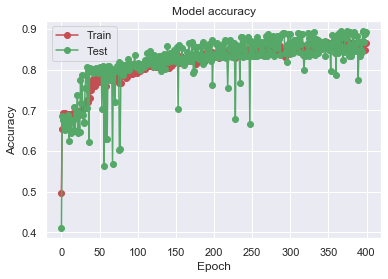

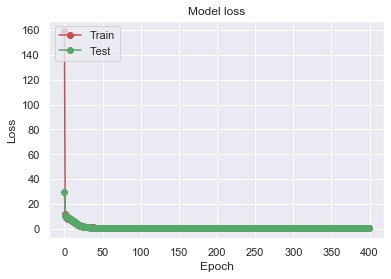

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


plt.plot(history.history['accuracy'],'o-', color="r",label="Training score")
plt.plot(history.history['val_accuracy'], 'o-', color="g",label="Test score")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'],'o-', color="r",label="Training score")
plt.plot(history.history['val_loss'], 'o-', color="g",label="Test score")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Text(111.5, 0.5, 'true')

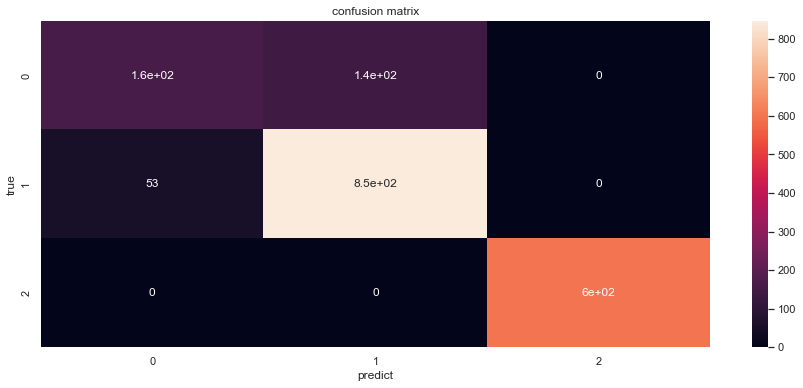

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
f,ax=plt.subplots(figsize=(15,6))

y_pred=model.predict(X_test)
C2= confusion_matrix(np.argmax(y_test.to_numpy(), axis=1),np.argmax(y_pred, axis=1))

sns.heatmap(C2,annot=True,ax=ax) #Dibuja un mapa de calor

ax.set_title('confusion matrix') #título
ax.set_xlabel('predict') #eje x
ax.set_ylabel('true') #eje y

In [10]:
weights = model.get_weights()
weights

[array([[ 0.06254219, -0.04052442,  0.20596772],
        [-0.3387747 , -0.26463133, -0.35197398],
        [-0.10578684, -0.13061877, -0.20204595]], dtype=float32),
 array([ -2.1372726,   6.6744857, -15.046644 ], dtype=float32)]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df[["Valor_R","Valor_V","Valor_A"]], pd.get_dummies(df["COLOR"]), test_size = 0.3, stratify = df["COLOR"])

In [12]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(3, input_dim=3,activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,epochs=400,validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
132/132 [==============================] - 1s 4ms/step - loss: 417.9861 - accuracy: 0.1666 - val_loss: 274.5179 - val_accuracy: 0.1668
Epoch 2/400
132/132 [==============================] - 0s 3ms/step - loss: 178.0508 - accuracy: 0.1666 - val_loss: 89.9863 - val_accuracy: 0.1668
Epoch 3/400
132/132 [==============================] - 0s 2ms/step - loss: 40.6437 - accuracy: 0.4839 - val_loss: 14.9852 - val_accuracy: 0.5926
Epoch 4/400
132/132 [==============================] - 0s 2ms/step - loss: 6.5868 - accuracy: 0.7023 - val_loss: 4.3810 - val_accuracy: 0.7788
Epoch

Epoch 110/400
132/132 [==============================] - 0s 3ms/step - loss: 0.5565 - accuracy: 0.9430 - val_loss: 0.7096 - val_accuracy: 0.9450
Epoch 111/400
132/132 [==============================] - 0s 3ms/step - loss: 0.5342 - accuracy: 0.9452 - val_loss: 0.7006 - val_accuracy: 0.9250
Epoch 112/400
132/132 [==============================] - 0s 3ms/step - loss: 0.5476 - accuracy: 0.9433 - val_loss: 0.6974 - val_accuracy: 0.9439
Epoch 113/400
132/132 [==============================] - 0s 3ms/step - loss: 0.5375 - accuracy: 0.9461 - val_loss: 0.6414 - val_accuracy: 0.9400
Epoch 114/400
132/132 [==============================] - 1s 4ms/step - loss: 0.5280 - accuracy: 0.9473 - val_loss: 0.6978 - val_accuracy: 0.9216
Epoch 115/400
132/132 [==============================] - 0s 3ms/step - loss: 0.5034 - accuracy: 0.9433 - val_loss: 0.6560 - val_accuracy: 0.9477
Epoch 116/400
132/132 [==============================] - 1s 4ms/step - loss: 0.4847 - accuracy: 0.9440 - val_loss: 0.6437 - val_ac

132/132 [==============================] - 0s 3ms/step - loss: 0.1012 - accuracy: 0.9826 - val_loss: 0.1827 - val_accuracy: 0.9744
Epoch 223/400
132/132 [==============================] - 0s 3ms/step - loss: 0.1024 - accuracy: 0.9828 - val_loss: 0.1705 - val_accuracy: 0.9711
Epoch 224/400
132/132 [==============================] - 0s 3ms/step - loss: 0.1192 - accuracy: 0.9812 - val_loss: 0.1514 - val_accuracy: 0.9800
Epoch 225/400
132/132 [==============================] - 0s 3ms/step - loss: 0.1086 - accuracy: 0.9836 - val_loss: 0.1416 - val_accuracy: 0.9794
Epoch 226/400
132/132 [==============================] - 0s 3ms/step - loss: 0.1015 - accuracy: 0.9857 - val_loss: 0.1710 - val_accuracy: 0.9739
Epoch 227/400
132/132 [==============================] - 0s 2ms/step - loss: 0.1509 - accuracy: 0.9819 - val_loss: 0.1489 - val_accuracy: 0.9800
Epoch 228/400
132/132 [==============================] - 0s 3ms/step - loss: 0.0881 - accuracy: 0.9876 - val_loss: 0.1717 - val_accuracy: 0.9750

132/132 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9943 - val_loss: 0.0504 - val_accuracy: 0.9906
Epoch 335/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9959 - val_loss: 0.0591 - val_accuracy: 0.9928
Epoch 336/400
132/132 [==============================] - 0s 3ms/step - loss: 0.0461 - accuracy: 0.9928 - val_loss: 0.0935 - val_accuracy: 0.9755
Epoch 337/400
132/132 [==============================] - 0s 2ms/step - loss: 0.0693 - accuracy: 0.9838 - val_loss: 0.0737 - val_accuracy: 0.9794
Epoch 338/400
132/132 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9943 - val_loss: 0.0488 - val_accuracy: 0.9906
Epoch 339/400
132/132 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9952 - val_loss: 0.0522 - val_accuracy: 0.9906
Epoch 340/400
132/132 [==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.9936 - val_loss: 0.0623 - val_accuracy: 0.9917

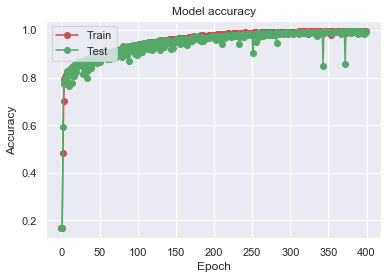

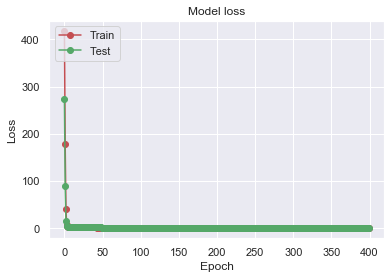

In [13]:
plt.plot(history.history['accuracy'],'o-', color="r",label="Training score")
plt.plot(history.history['val_accuracy'], 'o-', color="g",label="Test score")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'],'o-', color="r",label="Training score")
plt.plot(history.history['val_loss'], 'o-', color="g",label="Test score")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Text(111.5, 0.5, 'true')

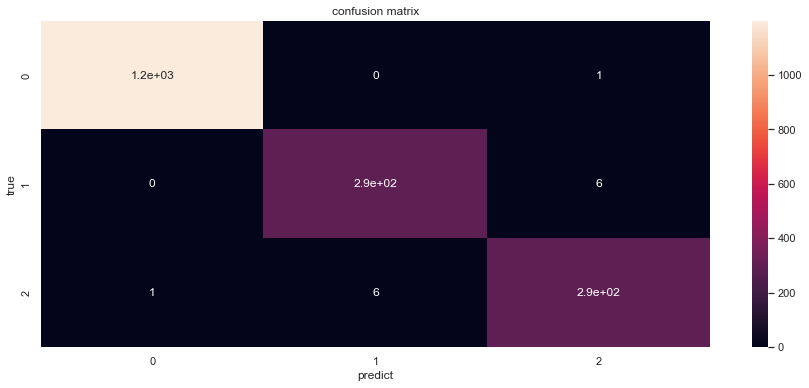

In [14]:

f,ax=plt.subplots(figsize=(15,6))

y_pred=model.predict(X_test)
C2= confusion_matrix(np.argmax(y_test.to_numpy(), axis=1),np.argmax(y_pred, axis=1))

sns.heatmap(C2,annot=True,ax=ax) #Dibuja un mapa de calor

ax.set_title('confusion matrix') #título
ax.set_xlabel('predict') #eje x
ax.set_ylabel('true') #eje y

In [15]:
weights = model.get_weights()
weights

[array([[ 0.02406185,  0.3222969 ,  0.15918957],
        [-0.26515573, -0.2312959 , -0.14689854],
        [ 0.01701651, -0.32383794, -0.24281518]], dtype=float32),
 array([ 15.029625 , -13.343204 ,   2.8190722], dtype=float32)]

In [27]:

X_train, X_test, y_train, y_test = train_test_split(df[["Valor_R","Valor_V","Valor_A"]], df["IBU"], test_size = 0.3, stratify = df["IBU"])

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    IBU   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     744.5
Date:                Tue, 14 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:10:01   Log-Likelihood:                -17980.
No. Observations:                4195   AIC:                         3.597e+04
Df Residuals:                    4191   BIC:                         3.599e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.9937      0.798     31.319      0.0

C:\Users\ADMIN1\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

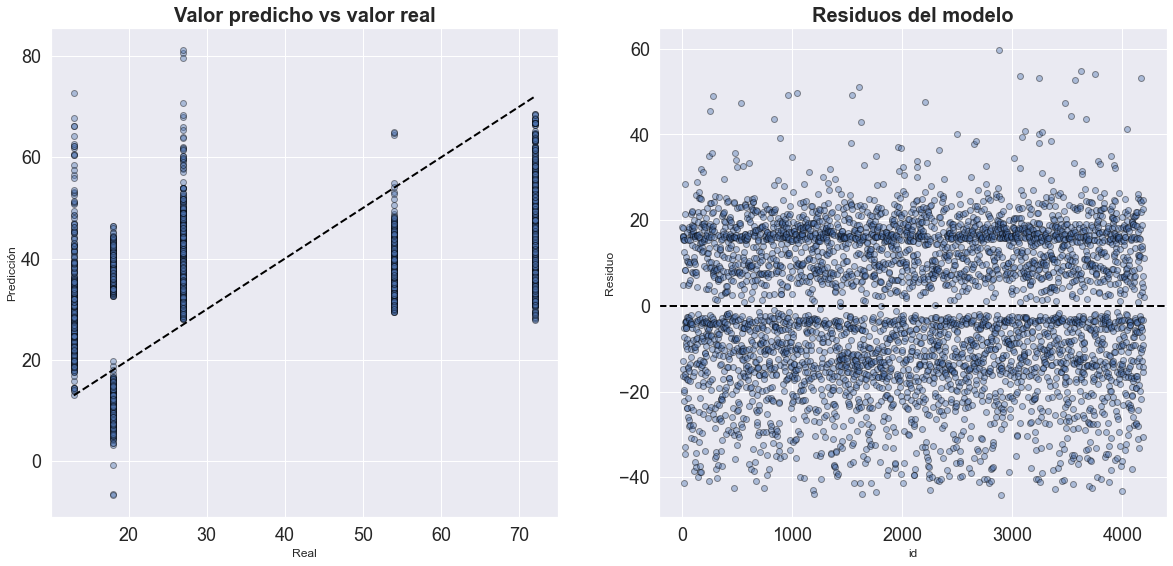

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))

axes[ 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[ 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[ 0].set_title('Valor predicho vs valor real', fontsize = 20, fontweight = "bold")
axes[ 0].set_xlabel('Real')
axes[ 0].set_ylabel('Predicción')
axes[ 0].tick_params(labelsize = 18)

axes[ 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[ 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[ 1].set_title('Residuos del modelo', fontsize = 20, fontweight = "bold")
axes[ 1].set_xlabel('id')
axes[ 1].set_ylabel('Residuo')
axes[ 1].tick_params(labelsize = 18)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df[["Valor_R","Valor_V","Valor_A"]], df["ALCOHOL"], test_size = 0.3, stratify = df["ALCOHOL"])

In [11]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                ALCOHOL   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     189.9
Date:                Tue, 14 Jun 2022   Prob (F-statistic):          1.86e-115
Time:                        14:47:17   Log-Likelihood:                -3267.4
No. Observations:                4195   AIC:                             6543.
Df Residuals:                    4191   BIC:                             6568.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2090      0.024    218.619      0.0

C:\Users\ADMIN1\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [12]:
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

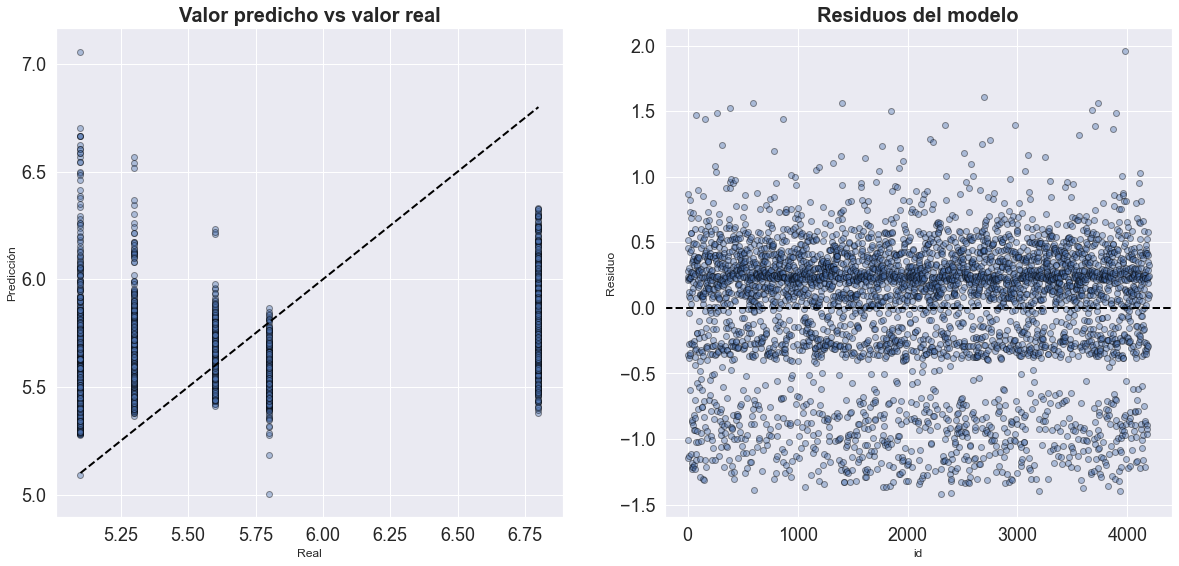

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 9))

axes[ 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[ 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[ 0].set_title('Valor predicho vs valor real', fontsize = 20, fontweight = "bold")
axes[ 0].set_xlabel('Real')
axes[ 0].set_ylabel('Predicción')
axes[ 0].tick_params(labelsize = 18)

axes[ 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[ 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[ 1].set_title('Residuos del modelo', fontsize = 20, fontweight = "bold")
axes[ 1].set_xlabel('id')
axes[ 1].set_ylabel('Residuo')
axes[ 1].tick_params(labelsize = 18)

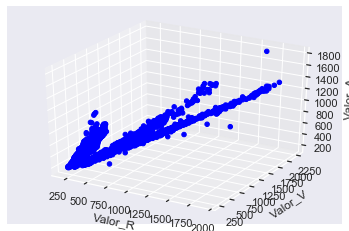

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_train["Valor_R"], X_train["Valor_V"], X_train["Valor_A"],
           c='blue',
           marker='o',
           alpha=1)



ax.set_xlabel("Valor_R")
ax.set_ylabel("Valor_V")
ax.set_zlabel("Valor_A")

plt.show()